### Heat Map Template

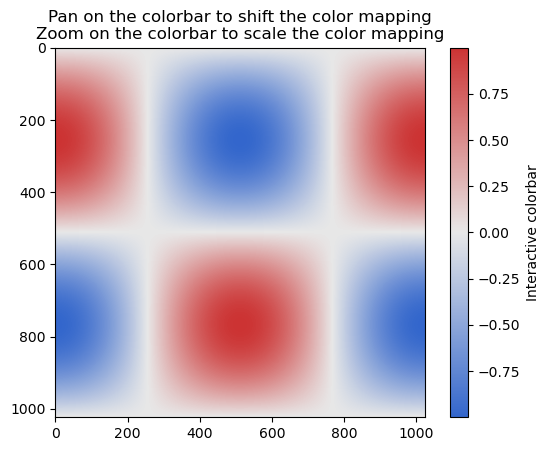

In [90]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np


colors = ['#B3D9FF', '#E0E0E0', '#FFB3B3']
colors = ['#69B3FF', '#C0C0C0', '#FF7F7F']
colors = ['#3366CC', '#E8E8E8', '#CC3333'] 
cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

t = np.linspace(0, 2 * np.pi, 1024)
data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

fig, ax = plt.subplots()
im = ax.imshow(data2d,cmap=cmap)
ax.set_title('Pan on the colorbar to shift the color mapping\n'
             'Zoom on the colorbar to scale the color mapping')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()

### Red MOT Heatmap

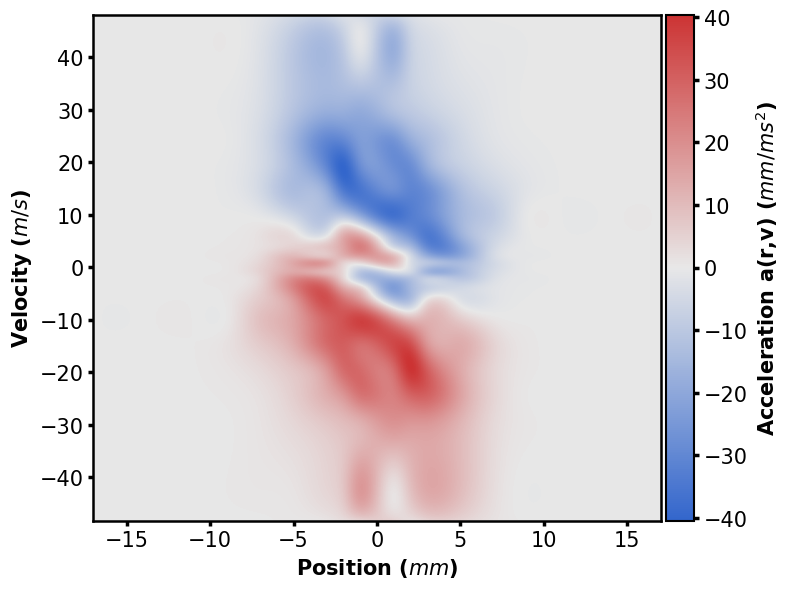

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable  # for consistent colorbar height


# ====== 1. Read CSV data ======
# Assumes: first row = x coordinates, first column = y coordinates, top-left cell = NaN
df_raw = pd.read_csv('SnMOTPaper/Heatmap20250404_2020.csv', header=None)

# Use the first row as column headers, and the first column as row index
df_raw.columns = df_raw.iloc[0]
df_raw.index = df_raw.iloc[:, 0]

# Remove the NaN row and column
df = df_raw.drop(index=df_raw.index[0], columns=df_raw.columns[0])

# Convert axes labels to float (physical coordinates)
df.columns = df.columns.astype(float)  # x-axis labels
df.index = df.index.astype(float)      # y-axis labels

# ====== 2. Extract data matrix & coordinate arrays ======
data = df.to_numpy()                  # 2D data matrix
x_coords = df.columns.to_numpy()     # x-coordinates
y_coords = df.index.to_numpy()       # y-coordinates

# ====== 3. Create heatmap using imshow ======
fig, ax = plt.subplots(figsize=(8, 6))

# Create a custom red-white-blue colormap
red_blue = LinearSegmentedColormap.from_list("red_blue", ["red", "white", "blue"])
# Define a custom colormap with deeper red/blue
cmap_custom =LinearSegmentedColormap.from_list(
    "cmap_custom",
    [
        (0.0,"#8B0000" ),  # darkblue
        (0.2, "#FF0000"),  # blue
        (0.50, '#F5F5F5'),  # gray
        (0.8,"#0000FF" ),  # red
        (1.0, "#00008B" ), # darkred 
    ]
)



# Use axes divider to match colorbar height with main plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)  # Add colorbar axis to the right

# Plot the heatmap

im = ax.imshow(data,
               cmap=cmap,
               origin = "lower",
               extent=[x_coords[0], x_coords[-1], y_coords[0], y_coords[-1]],
               aspect="auto")
#im.set_clim(-30, 30)  # 相当于 vmin=-2, vmax=2

# ====== 4. Add colorbar ======
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r"Acceleration a(r,v) ($mm/ms^2$)",fontsize=15, fontweight='bold')
cbar.ax.tick_params(labelsize=15, width=2.5)  # ticks and numbers

# ====== 5. Axis labels ======
ax.set_xlabel(r"Position ($mm$)",fontsize=15, fontweight='bold')
ax.set_ylabel(r"Velocity ($m/s$)",fontsize=15, fontweight='bold')
ax.tick_params(axis='both', labelsize=15, width=2.5)


# ====== 6. Fixed tick intervals ======
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(10))

for spine in cbar.ax.spines.values():
    spine.set_linewidth(1.5)

for spine in ax.spines.values():
    spine.set_linewidth(1.8)


plt.tight_layout()
plt.savefig("PaperFig/SnMOT_RedMOT_1.pdf", format='pdf',bbox_inches='tight', transparent=True)
plt.show()

### Acceleration vs Position & Acceleration vs Velocity

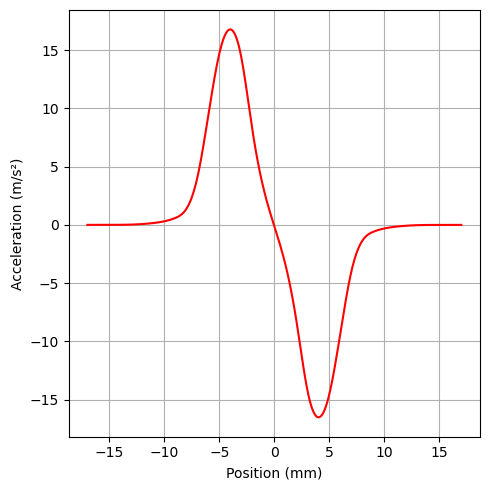

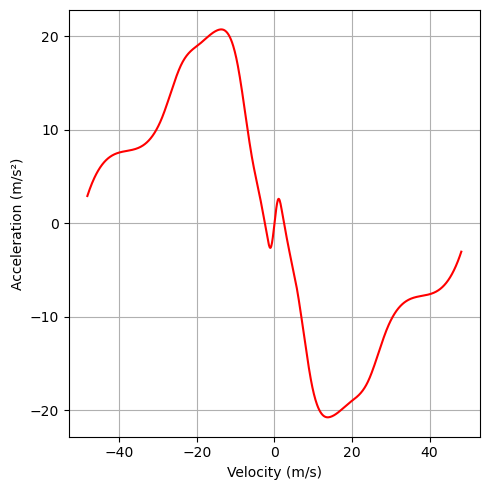

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Read the CSV file ===
# If your data is in Excel or CSV format, first save it as a CSV file, then update the file path below.
df_ar = pd.read_csv('SnMOTPaper/AccelVsPos20250404_2020.csv', header=None)

# === 2. Extract the two columns of data ===
df_ar.columns = ['Position', 'Acceleration']
x = df_ar['Position']
y = df_ar['Acceleration']

# === 3. Plot the data ===
plt.figure(figsize=(5, 5))
plt.plot(x, y, linestyle='-', color='red', label='a(x)')  # You can change to plt.scatter(x, y) for a scatter plot if desired.
plt.xlabel('Position (mm)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 1. Read the CSV file ===
# Again, if your data is in Excel or CSV format, first save it as a CSV file, then update the file path below.
df_av = pd.read_csv('SnMOTPaper/AccelVsVel20250404_2020.csv', header=None)

# === 2. Extract the two columns of data ===
df_av.columns = ['Velocity', 'Acceleration']
x = df_av['Velocity']
y = df_av['Acceleration']

# === 3. Plot the data ===
plt.figure(figsize=(5, 5))
plt.plot(x, y, linestyle='-', color='red', label='a(x)')  # You can change to plt.scatter(x, y) for a scatter plot if preferred.
plt.xlabel('Velocity (m/s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)
plt.tight_layout()
plt.show()


Accelera
Another Template with Major and Minor Grids

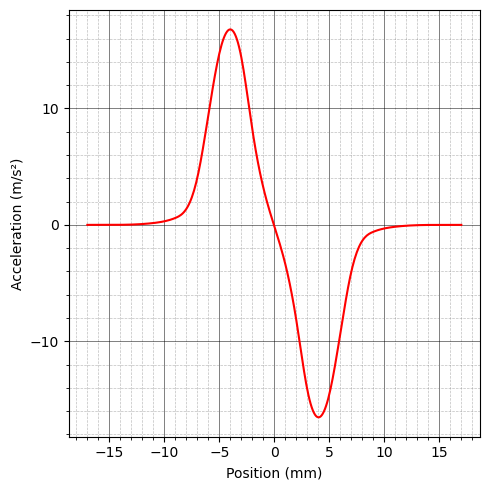

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# === 1. Read the CSV file ===
df_ar = pd.read_csv('SnMOTPaper/AccelVsPos20250404_2020.csv', header=None)
df_ar.columns = ['Position', 'Acceleration']

x = df_ar['Position']
y = df_ar['Acceleration']

# === 2. Create a figure and axis ===
fig, ax = plt.subplots(figsize=(5, 5))

# === 3. Plot the data ===
ax.plot(x, y, linestyle='-', color='red', label='a(x)')

# === 4. Customize the axis ticks ===
# Major ticks every 0.5 on the x-axis (adjust as needed)
ax.xaxis.set_major_locator(MultipleLocator(5))
# Minor ticks: automatically determined subdivisions
ax.xaxis.set_minor_locator(AutoMinorLocator())

# Similarly for the y-axis (customize to your data range)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator())

# === 5. Enable and style the grid ===
# Make sure the grid is behind the data
ax.set_axisbelow(True)

# Major grid lines: solid, thinner black
ax.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.7)

# Minor grid lines: dashed, lighter gray
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# === 6. Labeling and layout ===
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Acceleration (m/s²)')
#ax.legend()
plt.tight_layout()
plt.show()

### Paper-Figure For Red MOT Simulation
Five subfigures:
1. (a)Heatmap
2. (b)Acceleration vs Position
3. (c)Capture_Velocity Trajectories
4. (d)Acceleration vs Velocity
5. (e)Trajectory in RedMOT 

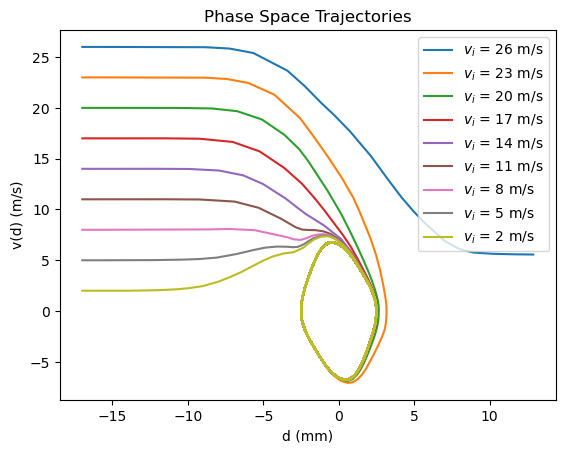

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df_capvel = pd.read_csv('SnMOTPaper/Capvel_trajectories20250404_2020.csv', header=0)

# 创建图
plt.figure()

for v0 in sorted(df_capvel['v0'].unique(), reverse=True):
    subset = df_capvel[df_capvel['v0'] == v0]
    plt.plot(subset['position'], subset['velocity'], label=rf'$v_i$ = {int(v0)} m/s')

# 添加标签和图例
plt.xlabel('d (mm)')
plt.ylabel('v(d) (m/s)')
plt.title('Phase Space Trajectories')
plt.legend()
#plt.grid(True)
plt.show()

/var/folders/sy/m1rps4v92fxg39fsm9s47gph0000gn/T/ipykernel_86055/3570354095.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/sy/m1rps4v92fxg39fsm9s47gph0000gn/T/ipykernel_86055/3570354095.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


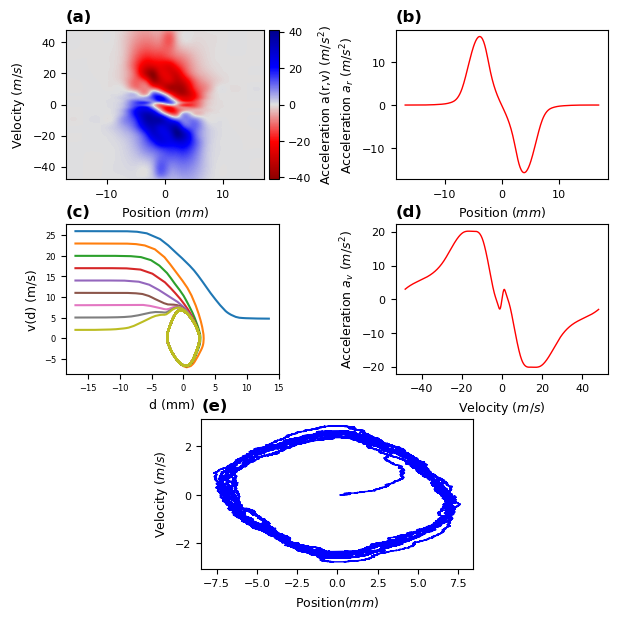

In [16]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np
import pandas as pd  # Import pandas for data handling
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

datatime='20250405_0246'

# ===================== 1. Read Data =====================
# Read acceleration vs. position data (no header in file)
df_ar = pd.read_csv('SnMOTPaper/AccelVsPos'+datatime+'.csv', header=None)
df_ar.columns = ['Position', 'Acceleration']  # Define column names for clarity

# Read acceleration vs. velocity data (no header in file)
df_av = pd.read_csv('SnMOTPaper/AccelVsVel'+datatime+'.csv', header=None)
df_av.columns = ['Velocity', 'Acceleration']

# Read Capture Trajectories with different initial parameters
df_capvel = pd.read_csv('SnMOTPaper/Capvel_trajectories'+datatime+'.csv', header=0)

# Read Trapped Trajectories in Red_MOT 
df_traj = pd.read_csv('SnMOTPaper/MOTTrajectoryYesScatter'+datatime+'.csv', header=None,names=['velocity','position'])

# Read CSV data for Heatmap
# Assumes: first row = x coordinates, first column = y coordinates, top-left cell = NaN
df_raw = pd.read_csv('SnMOTPaper/Heatmap'+datatime+'.csv', header=None)
# Use the first row as column headers, and the first column as row index
df_raw.columns = df_raw.iloc[0]
df_raw.index = df_raw.iloc[:, 0]
# Remove the NaN row and column
df = df_raw.drop(index=df_raw.index[0], columns=df_raw.columns[0])
# Convert axes labels to float (physical coordinates)
df.columns = df.columns.astype(float)  # x-axis labels
df.index = df.index.astype(float)      # y-axis labels
# Extract data matrix & coordinate arrays 
data = df.to_numpy()                  # 2D data matrix
x_coords = df.columns.to_numpy()     # x-coordinates
y_coords = df.index.to_numpy()       # y-coordinates


# 2. Panels (a) to (e) - Top two rows (2x2 layout) Bottom row (1x1) but with a narrower width

# -------------------------------
#  Create overall figure and GridSpec layout
# -------------------------------
fig = plt.figure(figsize=(7, 7))  # overall figure size in inches
# Create a main GridSpec with 3 rows and 2 columns.
# The top two rows hold panels (a)-(d), and the bottom row is reserved for panel (e)
gs = GridSpec(nrows=3, ncols=2, figure=fig, hspace=0.3, wspace=0.55, height_ratios=[1, 1, 1])


# ===================== 2.1 Panel (a): Heatmap for Red_MOT =====================
ax_a = fig.add_subplot(gs[0, 0])

# Create a custom colormap that transitions from blue to white to red
red_blue = LinearSegmentedColormap.from_list("red_blue", ["blue", "white", "red"])
cmap_custom =LinearSegmentedColormap.from_list(
    "cmap_custom",
    [
        (0.0,  "#00008B"),  # darkblue
        (0.25, "#0000FF"),  # blue
        (0.50, '#E0E0E0'),  # gray
        (0.75, "#FF0000"),  # red
        (1.0,  "#8B0000"), # darkredred
    ]
)
cmap_custom_r = cmap_custom.reversed()

# Normalize the colormap with a center value of 0 so that the midpoint of the colormap corresponds to 0.
norm = TwoSlopeNorm(vmin=np.min(data), vcenter=0, vmax=np.max(data))

# Create an axes divider for placing the colorbar next to the heatmap
divider = make_axes_locatable(ax_a)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Display the heatmap using imshow. 'extent' sets the coordinate system using x_coords and y_coords.
im = ax_a.imshow(data, cmap=cmap_custom_r, norm=norm, origin="lower",
                 extent=[x_coords[0], x_coords[-1], y_coords[0], y_coords[-1]],
                 aspect="auto")

# Add a colorbar to the heatmap and label it
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r"Acceleration a(r,v) ($m/s^2$)", fontsize=9)
cbar.ax.tick_params(labelsize=8)

# Set axis labels and tick parameters for the heatmap subplot
ax_a.set_xlabel(r"Position ($mm$)", fontsize=9)
ax_a.set_ylabel(r"Velocity ($m/s$)", fontsize=9)
ax_a.tick_params(labelsize=8)
ax_a.set_title("(a)", loc='left', fontsize=12, fontweight='bold')


# ===================== 2.2 Panel (b): Acceleration vs. Position =====================
ax_b = fig.add_subplot(gs[0, 1])

# Plot acceleration vs. position
ax_b.plot(df_ar['Position'], df_ar['Acceleration'], color='red', linestyle='-', linewidth=1)
ax_b.set_xlabel(r'Position ($mm$)', fontsize=9)
ax_b.set_ylabel(r'Acceleration $a_r$ ($m/s^2$)', fontsize=9)
ax_b.tick_params(labelsize=8)
#ax_b.grid(True, alpha=0.3)  # Add a grid for easier reading
ax_b.set_title("(b)", loc='left', fontsize=12, fontweight='bold')


# Panel (c): Bottom-left of the top two rows (row 1, col 0)
ax_c = fig.add_subplot(gs[1, 0])
for v0 in sorted(df_capvel['v0'].unique(), reverse=True):
    subset = df_capvel[df_capvel['v0'] == v0]
    ax_c.plot(subset['position'], subset['velocity'], label=rf'$v_i$ = {int(v0)} m/s')

ax_c.set_xlabel('d (mm)', fontsize=9)
ax_c.set_ylabel('v(d) (m/s)', fontsize=9)
ax_c.tick_params(labelsize=6)
#ax_c.grid(True, linestyle='--', alpha=0.5)
ax_c.set_title("(c)", loc='left', fontsize=12, fontweight='bold')

# ===================== 2.4 Panel(d): Velocity vs. Acceleration =====================
ax_d = fig.add_subplot(gs[1, 1])
# Plot velocity vs. acceleration
ax_d.plot(df_av['Velocity'], df_av['Acceleration'], color='red', linestyle='-', linewidth=1)
ax_d.set_xlabel(r'Velocity ($m/s$)', fontsize=9)
ax_d.set_ylabel(r'Acceleration $a_v$ ($m/s^2$)', fontsize=9)
ax_d.tick_params(labelsize=8)
#ax_d.grid(True, alpha=0.3)  # Add a grid for easier reading
ax_d.set_title("(d)", loc='left', fontsize=12, fontweight='bold')

# ===================== 2.5 Panel(e): Trajectory Simulation in RedMOT =====================
# Instead of spanning the entire bottom row, we create a nested GridSpec in the bottom row (gs[2, :])
# and set width_ratios so that panel (e) occupies only the middle portion.
gs_bottom = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2, :], wspace=0.3, width_ratios=[1, 3, 1])
# Use the middle column of the nested GridSpec for panel (e)
ax_e = fig.add_subplot(gs_bottom[0, 1])
ax_e.plot( df_traj['position'], df_traj['velocity'],color='blue',linewidth=1)
ax_e.set_ylabel(r'Velocity ($m/s$)', fontsize=9)
ax_e.set_xlabel(r'Position($mm$)', fontsize=9)
ax_e.tick_params(labelsize=8)
ax_e.set_title("(e)", loc='left', fontsize=12, fontweight='bold')
#ax_e.grid(True, linestyle='--', alpha=0.5)

# ===================== 3. Finalize Layout and Save Figure =====================
# Save the final figure as a PDF with a tight bounding box and a transparent background.
plt.tight_layout()
plt.savefig("PaperFig/SnMOT_RedMOT.pdf", format='pdf', bbox_inches='tight', transparent=True)
#  Final adjustments and display
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np
import pandas as pd  # Import pandas for data handling
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

datatime='20250405_0246'

# ===================== 1. Read Data =====================
# Read acceleration vs. position data (no header in file)
df_ar = pd.read_csv('SnMOTPaper/AccelVsPos'+datatime+'.csv', header=None)
df_ar.columns = ['Position', 'Acceleration']  # Define column names for clarity

# Read acceleration vs. velocity data (no header in file)
df_av = pd.read_csv('SnMOTPaper/AccelVsVel'+datatime+'.csv', header=None)
df_av.columns = ['Velocity', 'Acceleration']

# Read Capture Trajectories with different initial parameters
df_capvel = pd.read_csv('SnMOTPaper/Capvel_trajectories'+datatime+'.csv', header=0)

# Read Trapped Trajectories in Red_MOT 
df_traj = pd.read_csv('SnMOTPaper/MOTTrajectoryYesScatter'+datatime+'.csv', header=None,names=['velocity','position'])

# Read CSV data for Heatmap
# Assumes: first row = x coordinates, first column = y coordinates, top-left cell = NaN
df_raw = pd.read_csv('SnMOTPaper/Heatmap'+datatime+'.csv', header=None)
# Use the first row as column headers, and the first column as row index
df_raw.columns = df_raw.iloc[0]
df_raw.index = df_raw.iloc[:, 0]
# Remove the NaN row and column
df = df_raw.drop(index=df_raw.index[0], columns=df_raw.columns[0])
# Convert axes labels to float (physical coordinates)
df.columns = df.columns.astype(float)  # x-axis labels
df.index = df.index.astype(float)      # y-axis labels
# Extract data matrix & coordinate arrays 
data = df.to_numpy()                  # 2D data matrix
x_coords = df.columns.to_numpy()     # x-coordinates
y_coords = df.index.to_numpy()       # y-coordinates


#

/var/folders/sy/m1rps4v92fxg39fsm9s47gph0000gn/T/ipykernel_86055/2030953610.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/sy/m1rps4v92fxg39fsm9s47gph0000gn/T/ipykernel_86055/2030953610.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


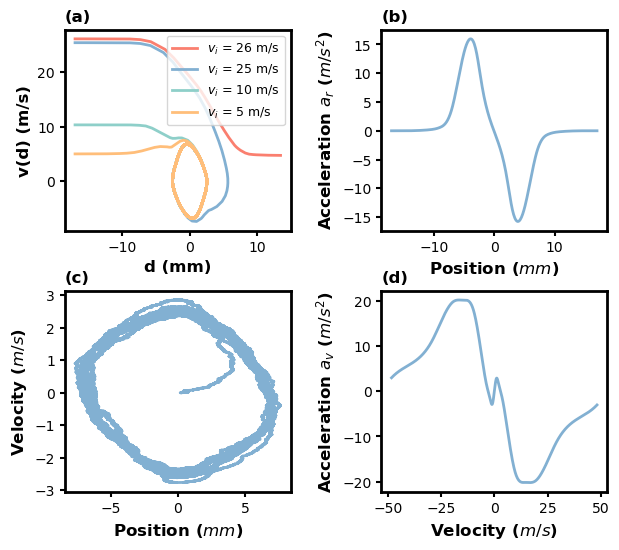

In [80]:

# Create overall figure and GridSpec layout
fig = plt.figure(figsize=(7, 6))  # overall figure size in inches
gs = GridSpec(nrows=2, ncols=2, figure=fig, hspace=0.3, wspace=0.4, height_ratios=[1, 1])

# ===================== 2.1 Panel (a): Heatmap for Red_MOT =====================
ax_a = fig.add_subplot(gs[0, 0])

colzip =['#FA7F6F','#82B0D2','#8ECFC9','#FFBE7A',]
vsorted=sorted(df_capvel['v0'].unique(), reverse=True)


for v0, col in zip(vsorted,colzip):
    subset = df_capvel[df_capvel['v0'] == v0]
    ax_a.plot(subset['position'], subset['velocity'], label=rf'$v_i$ = {int(v0)} m/s',color=col, linewidth=2)

# Label and formatting
ax_a.set_xlabel('d (mm)', fontsize=12, fontweight='bold')
ax_a.set_ylabel('v(d) (m/s)', fontsize=12, fontweight='bold')
ax_a.tick_params(axis='both', which='major', labelsize=10, width=1.5)
ax_a.legend(fontsize=9,loc='upper right')
ax_a.set_title("(a)", loc='left', fontsize=12, fontweight='bold')
for spine in ax_a.spines.values():
    spine.set_linewidth(2)

# ===================== 2.2 Panel (b): Acceleration vs. Position =====================
ax_b = fig.add_subplot(gs[0, 1])
ax_b.plot(df_ar['Position'], df_ar['Acceleration'], color='#82B0D2',linestyle='-', linewidth=2)

ax_b.set_xlabel(r'Position ($mm$)', fontsize=12, fontweight='bold')
ax_b.set_ylabel(r'Acceleration $a_r$ ($m/s^2$)', fontsize=12, fontweight='bold')
ax_b.tick_params(axis='both', which='major', labelsize=10, width=1.5)
ax_b.set_title("(b)", loc='left', fontsize=12, fontweight='bold')
for spine in ax_b.spines.values():
    spine.set_linewidth(2)

# ===================== 2.3 Panel (c): Trajectory Figure =====================
ax_c = fig.add_subplot(gs[1, 0])
ax_c.plot(df_traj['position'], df_traj['velocity'],color='#82B0D2', linewidth=2)

ax_c.set_xlabel(r'Position ($mm$)', fontsize=12, fontweight='bold')
ax_c.set_ylabel(r'Velocity ($m/s$)', fontsize=12, fontweight='bold')
ax_c.tick_params(axis='both', which='major', labelsize=10, width=1.5)
ax_c.set_title("(c)", loc='left', fontsize=12, fontweight='bold')
for spine in ax_c.spines.values():
    spine.set_linewidth(2)

# ===================== 2.4 Panel (d): Velocity vs. Acceleration =====================
ax_d = fig.add_subplot(gs[1, 1])
ax_d.plot(df_av['Velocity'], df_av['Acceleration'], color='#82B0D2', linestyle='-', linewidth=2)

ax_d.set_xlabel(r'Velocity ($m/s$)', fontsize=12, fontweight='bold')
ax_d.set_ylabel(r'Acceleration $a_v$ ($m/s^2$)', fontsize=12, fontweight='bold')
ax_d.tick_params(axis='both', which='major', labelsize=10, width=1.5)
ax_d.set_title("(d)", loc='left', fontsize=12, fontweight='bold')
for spine in ax_d.spines.values():
    spine.set_linewidth(2)

# ===================== 3. Finalize Layout and Save Figure =====================
plt.tight_layout()
plt.savefig("PaperFig/SnMOT_RedMOT_supp.pdf", format='pdf', bbox_inches='tight', transparent=True)
plt.tight_layout()